In [1]:
#final script

In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import re

In [3]:
employment_data = pd.read_csv("./Data/Unemployment and Household Income 2007-08.csv")
employment_data = employment_data.iloc[7:,]
employment_data = employment_data.rename(columns={"Unemployment and median household income for the U.S., States, and counties, 2007-18":"Unemployment Rate","Unnamed: 1": "State", "Unnamed: 2": "County/State","Unnamed: 3":"Rural 2013","Unnamed: 4":"Urban 2013","Unnamed: 5":"Metro 2013","Unnamed: 6":"CLF 2007","Unnamed: 7":"Emp 2007","Unnamed: 8":"Unemp 2007","Unnamed: 9":"Unemp Rate 2007","Unnamed: 10":"CLF 2008","Unnamed: 11":"Emp 2008","Unnamed: 12":"Unemp 2008","Unnamed: 13":"Unemp Rate 2008","Unnamed: 14":"CLF 2009","Unnamed: 15":"Emp 2009","Unnamed: 16":"Unemp 2009","Unnamed: 17":"Unemp Rate 2009","Unnamed: 18":"CLF 2010","Unnamed: 19":"Emp 2010","Unnamed: 20":"Unemp 2010","Unnamed: 21":"Unemp Rate 2010","Unnamed: 22":"CLF 2011","Unnamed: 23":"Emp 2011","Unnamed: 24":"Unemp 2011","Unnamed: 25":"Unemp Rate 2011","Unnamed: 26":"CLF 2012","Unnamed: 27":"Emp 2012","Unnamed: 28":"Unemp 2012","Unnamed: 29":"Unemp Rate 2012","Unnamed: 30":"CLF 2013","Unnamed: 31":"Emp 2013","Unnamed: 32":"Unemp 2013","Unnamed: 33":"Unemp Rate 2013","Unnamed: 34":"CLF 2014","Unnamed: 35":"Emp 2014","Unnamed: 36":"Unemp 2014","Unnamed: 37":"Unemp Rate 2014","Unnamed: 38":"CLF 2015","Unnamed: 39":"Emp 2015","Unnamed: 40":"Unemp 2015","Unnamed: 41":"Unemp Rate 2015","Unnamed: 42":"CLF 2016","Unnamed: 43":"Emp 2016","Unnamed: 44":"Unemp 2016","Unnamed: 45":"Unemp Rate 2016","Unnamed: 46":"CLF 2017","Unnamed: 47":"Emp 2017","Unnamed: 48":"Unemp 2017","Unnamed: 49":"Unemp Rate 2017","Unnamed: 50":"CLF 2018","Unnamed: 51":"Emp 2018","Unnamed: 52":"Unemp 2018","Unnamed: 53":"Unemp Rate 2018", "Unnamed: 54": "Median Household Income 2017", "Unnamed: 55": "Median HH Income (%) 2017"})
employment_data = employment_data.drop(["Unemployment Rate","Rural 2013", "Urban 2013", "Metro 2013"], axis=1)
employment_data_only = employment_data.drop(["Median Household Income 2017", "Median HH Income (%) 2017"], axis=1)
employment_data = employment_data.set_index("State")
employment_data = employment_data.drop('PR')

employment_data_only = employment_data_only.set_index("State")
employment_data_only = employment_data_only.drop('PR')
employment_data_only = employment_data_only.fillna('-')
employment_data = employment_data.fillna('-')

In [4]:
def parseFloat(data):
    parsedData = re.sub( '[^\d\.]', '', data)
    return (re.sub( '[^\d\.]', '', data)) if parsedData else 0
employment_d = employment_data_only.iloc[:,1:].applymap(parseFloat)
e = employment_d.astype('float')
e['County/State'] = employment_data_only['County/State']

In [5]:
state_abrev = ["AL", 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS','KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']
states = ["Alabama", 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas','Kentucky', 'Louisianna', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
years = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]

In [54]:
def us_unemployment(source):
    return source[["Unemp Rate 2007", "Unemp Rate 2008", 'Unemp Rate 2009',"Unemp Rate 2010", "Unemp Rate 2011", 'Unemp Rate 2012',"Unemp Rate 2013", "Unemp Rate 2014", 'Unemp Rate 2015',"Unemp Rate 2016", "Unemp Rate 2017", 'Unemp Rate 2018']]
us_unemployment = us_unemployment(us_data)
us_unemployment

,Unemp Rate 2007,Unemp Rate 2008,Unemp Rate 2009,Unemp Rate 2010,Unemp Rate 2011,Unemp Rate 2012,Unemp Rate 2013,Unemp Rate 2014,Unemp Rate 2015,Unemp Rate 2016,Unemp Rate 2017,Unemp Rate 2018
State,,,,,,,,,,,,
US,4.6,5.8,9.3,9.6,9.0,8.1,7.4,6.2,5.3,4.9,4.4,3.9


In [8]:
def parse_employment_data(state):
    return e.loc[e['County/State']== state]


In [9]:
def state_unemp(source):
    state = e_states.loc[e_states['County/State'] == source]
    return state[["Unemp Rate 2007", "Unemp Rate 2008", 'Unemp Rate 2009',"Unemp Rate 2010", "Unemp Rate 2011", 'Unemp Rate 2012',"Unemp Rate 2013", "Unemp Rate 2014", 'Unemp Rate 2015',"Unemp Rate 2016", "Unemp Rate 2017", 'Unemp Rate 2018']]


In [10]:
state_data = []
employment_data_by_state = {}
for state in states:
    employment_data_by_state[state] = {
        "employment_data": parse_employment_data(state)
    }
    state_data.append(employment_data_by_state[state]["employment_data"])
e_states = pd.concat(state_data, axis=0)
#e_states.loc[e_states['County/State']=='Arizona']
e_states.head()

,CLF 2007,Emp 2007,Unemp 2007,Unemp Rate 2007,CLF 2008,Emp 2008,Unemp 2008,Unemp Rate 2008,CLF 2009,Emp 2009,...,Unemp Rate 2016,CLF 2017,Emp 2017,Unemp 2017,Unemp Rate 2017,CLF 2018,Emp 2018,Unemp 2018,Unemp Rate 2018,County/State
State,,,,,,,,,,,,,,,,,,,,,
AL,2175612.0,2089127.0,86485.0,4.0,2176489.0,2053477.0,123012.0,5.7,2162999.0,1924747.0,...,5.8,2178243.0,2081676.0,96567.0,4.4,2198837.0,2112347.0,86490.0,3.9,Alabama
AK,350785.0,328579.0,22206.0,6.3,356109.0,332285.0,23824.0,6.7,359647.0,331792.0,...,6.9,360759.0,335682.0,25077.0,7.0,356886.0,333375.0,23511.0,6.6,Alaska
AZ,3034016.0,2917117.0,116899.0,3.9,3104863.0,2913903.0,190960.0,6.2,3128110.0,2817577.0,...,5.4,3327949.0,3165127.0,162822.0,4.9,3439755.0,3273550.0,166205.0,4.8,Arizona
AR,1369284.0,1296572.0,72712.0,5.3,1375257.0,1300017.0,75240.0,5.5,1358911.0,1252399.0,...,4.0,1347630.0,1297652.0,49978.0,3.7,1351496.0,1301459.0,50037.0,3.7,Arkansas
CA,17893080.0,16931590.0,961490.0,5.4,18178123.0,16854482.0,1323641.0,7.3,18215140.0,16182572.0,...,5.5,19205295.0,18285492.0,919803.0,4.8,19398212.0,18582802.0,815410.0,4.2,California


In [11]:
employment_data_by_state['Alabama']['employment_data']

,CLF 2007,Emp 2007,Unemp 2007,Unemp Rate 2007,CLF 2008,Emp 2008,Unemp 2008,Unemp Rate 2008,CLF 2009,Emp 2009,...,Unemp Rate 2016,CLF 2017,Emp 2017,Unemp 2017,Unemp Rate 2017,CLF 2018,Emp 2018,Unemp 2018,Unemp Rate 2018,County/State
State,,,,,,,,,,,,,,,,,,,,,
AL,2175612.0,2089127.0,86485.0,4.0,2176489.0,2053477.0,123012.0,5.7,2162999.0,1924747.0,...,5.8,2178243.0,2081676.0,96567.0,4.4,2198837.0,2112347.0,86490.0,3.9,Alabama


In [12]:
unemployment_state_data = []
unemplyment_data_by_state = {}
for state in states:
    unemplyment_data_by_state[state] = {
        'unemployment_data': state_unemp(state)
    }
    unemployment_state_data.append(unemplyment_data_by_state[state]['unemployment_data'])
    
unemp_states = pd.concat(unemployment_state_data, axis=0)
#unemp_states.T.plot.line(figsize=(20,20))


In [13]:
unemplyment_data_by_state['Alabama']['unemployment_data']

,Unemp Rate 2007,Unemp Rate 2008,Unemp Rate 2009,Unemp Rate 2010,Unemp Rate 2011,Unemp Rate 2012,Unemp Rate 2013,Unemp Rate 2014,Unemp Rate 2015,Unemp Rate 2016,Unemp Rate 2017,Unemp Rate 2018
State,,,,,,,,,,,,
AL,4.0,5.7,11.0,10.5,9.6,8.0,7.2,6.8,6.1,5.8,4.4,3.9


In [14]:
#adding median house price data to data frame

In [15]:
housing_data = pd.read_csv('./housing_data')
housing_data = housing_data.set_index("State")

In [16]:
def convert_year(year):
    yr = housing_data.loc[housing_data['Year']==year]
    del yr['Year']
    e_states[f'Median House Price {year}'] = yr

In [17]:
for year in years:
    convert_year(year)


In [18]:
def state_house_price(state):
    st = e_states.loc[e_states['County/State'] == state]
    return st[["Median House Price 2007","Median House Price 2008","Median House Price 2009","Median House Price 2010","Median House Price 2011","Median House Price 2012","Median House Price 2013","Median House Price 2014","Median House Price 2015","Median House Price 2016","Median House Price 2017","Median House Price 2018"]]

In [19]:
states_house_price = {}
for state in states:
    states_house_price[state] = {
        'house_price': state_house_price(state)
    }

In [20]:
states_house_price['Alabama']['house_price']

,Median House Price 2007,Median House Price 2008,Median House Price 2009,Median House Price 2010,Median House Price 2011,Median House Price 2012,Median House Price 2013,Median House Price 2014,Median House Price 2015,Median House Price 2016,Median House Price 2017,Median House Price 2018
State,,,,,,,,,,,,
AL,296060,305180,305450,289780,279240,277120,274880,275520,284250,290090,299640,311320


In [21]:
def sep_unemp_population(size):
    pop=e_states.loc[e_states["CLF Pop"]== size]
    return pop[["Unemp Rate 2007","Unemp Rate 2008","Unemp Rate 2009","Unemp Rate 2010","Unemp Rate 2011","Unemp Rate 2012","Unemp Rate 2013","Unemp Rate 2014","Unemp Rate 2015","Unemp Rate 2016","Unemp Rate 2017","Unemp Rate 2018"]]


In [22]:
def med_house_price_size(size):
    pop=e_states.loc[e_states["CLF Pop"]== size]
    return pop[["Median House Price 2007","Median House Price 2008","Median House Price 2009","Median House Price 2010","Median House Price 2011","Median House Price 2012","Median House Price 2013","Median House Price 2014","Median House Price 2015","Median House Price 2016","Median House Price 2017","Median House Price 2018"]]

In [23]:
bins = [0,1000000,2000000,3000000,4000000,5000000,20000000]
group_names = ["<1,000,000","1,000,000-2,000,000","2,000,000-3,000,000","3,000,000-4,000,000","4,000,000-5,000,000","5,000,000+"]
e_states["CLF Pop"] = pd.cut(e_states["CLF 2018"], bins, labels=group_names)


In [24]:
unemp_by_size = {}
for x in group_names:
    unemp_by_size[x] = {
    'unemp_by_size': sep_unemp_population(x)
    }
    

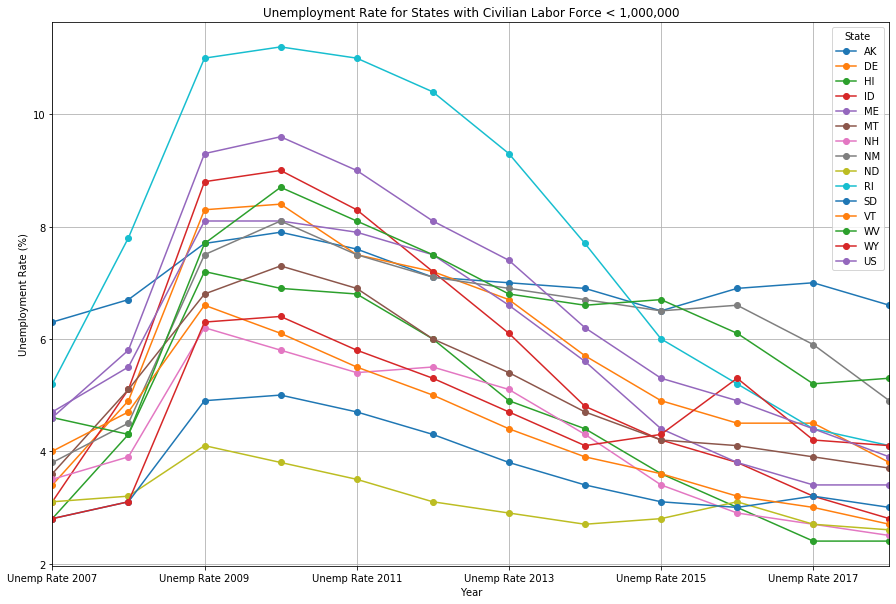

In [91]:
add_us =[unemp_by_size["<1,000,000"]['unemp_by_size'],us_unemployment]
results01 = pd.concat(add_us, axis=0)
results01.T.plot.line(figsize=(15,10), marker='o')
plt.title("Unemployment Rate for States with Civilian Labor Force < 1,000,000")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Year")
plt.grid()


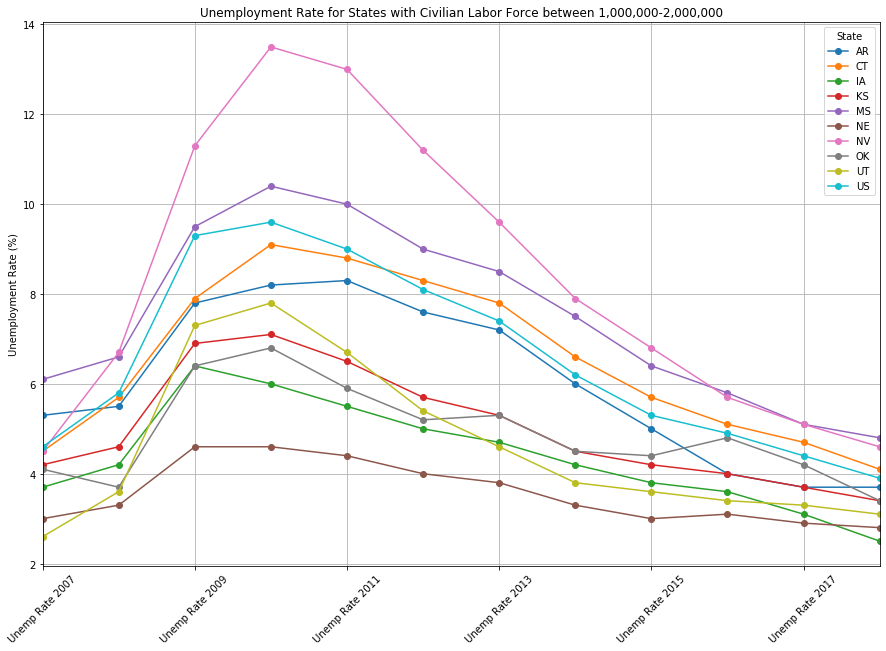

In [92]:
add_us1 =[unemp_by_size["1,000,000-2,000,000"]['unemp_by_size'],us_unemployment]
results02 = pd.concat(add_us1, axis=0)
results02.T.plot.line(figsize=(15,10), marker='o')
plt.xticks(rotation='45')
plt.title("Unemployment Rate for States with Civilian Labor Force between 1,000,000-2,000,000")
plt.ylabel("Unemployment Rate (%)")
plt.grid()

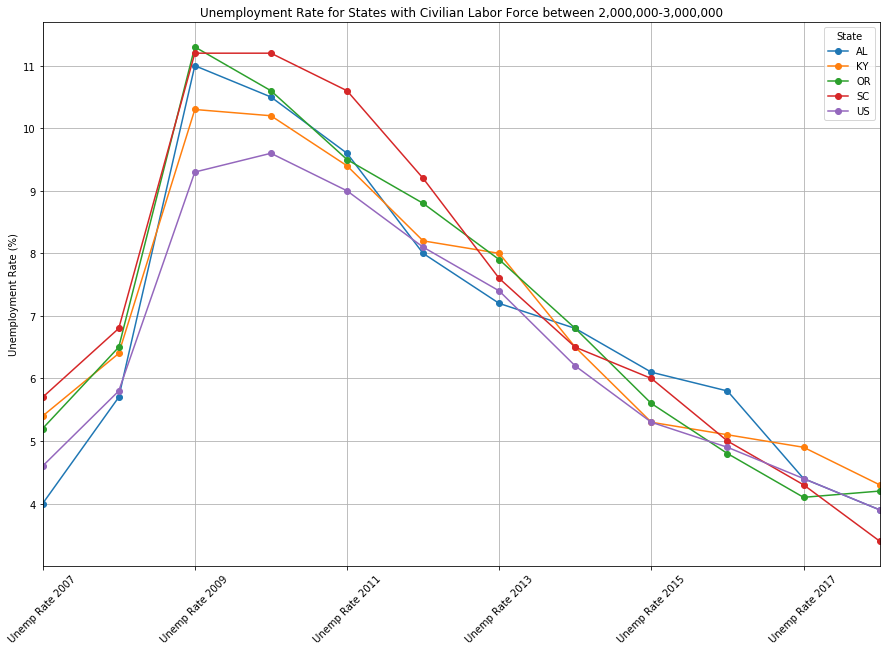

In [109]:
add_us2 =[unemp_by_size["2,000,000-3,000,000"]['unemp_by_size'],us_unemployment]
results03 = pd.concat(add_us2, axis=0)
results03.T.plot.line(figsize=(15,10), marker='o')
plt.xticks(rotation='45')
plt.title("Unemployment Rate for States with Civilian Labor Force between 2,000,000-3,000,000")
plt.ylabel("Unemployment Rate (%)")
plt.grid()

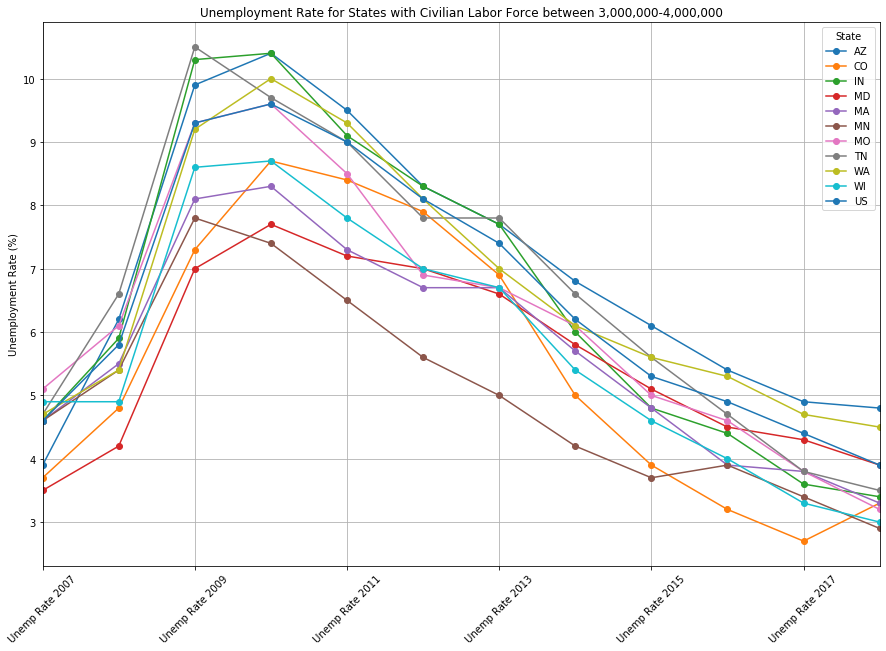

In [108]:
add_us3 =[unemp_by_size["3,000,000-4,000,000"]['unemp_by_size'],us_unemployment]
results04 = pd.concat(add_us3, axis=0)
results04.T.plot.line(figsize=(15,10), marker='o')
plt.xticks(rotation='45')
plt.title("Unemployment Rate for States with Civilian Labor Force between 3,000,000-4,000,000")
plt.ylabel("Unemployment Rate (%)")
plt.grid()

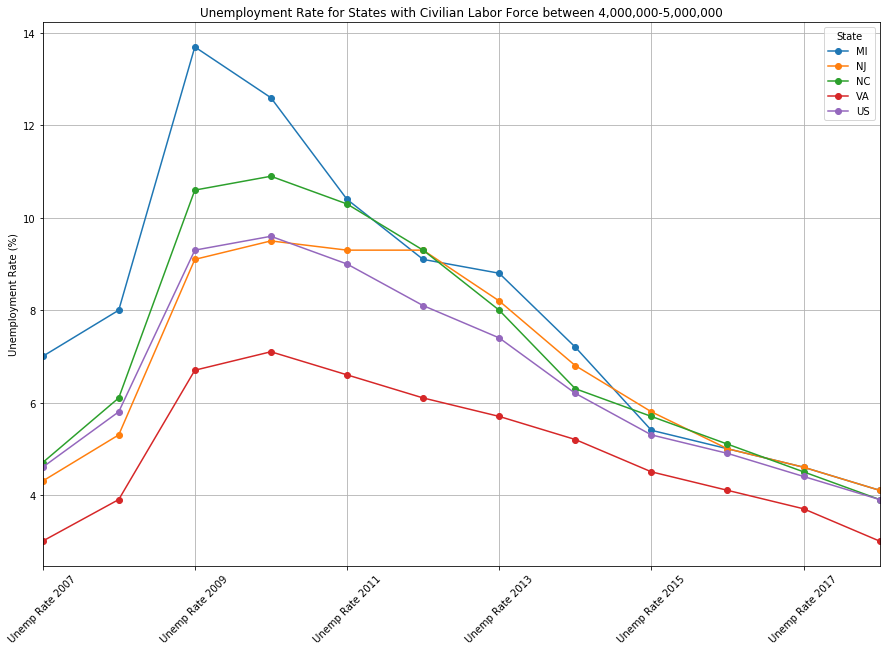

In [107]:
add_us4 =[unemp_by_size["4,000,000-5,000,000"]['unemp_by_size'],us_unemployment]
results05 = pd.concat(add_us4, axis=0)
results05.T.plot.line(figsize=(15,10), marker='o')
plt.xticks(rotation='45')
plt.title("Unemployment Rate for States with Civilian Labor Force between 4,000,000-5,000,000")
plt.ylabel("Unemployment Rate (%)")
plt.grid()

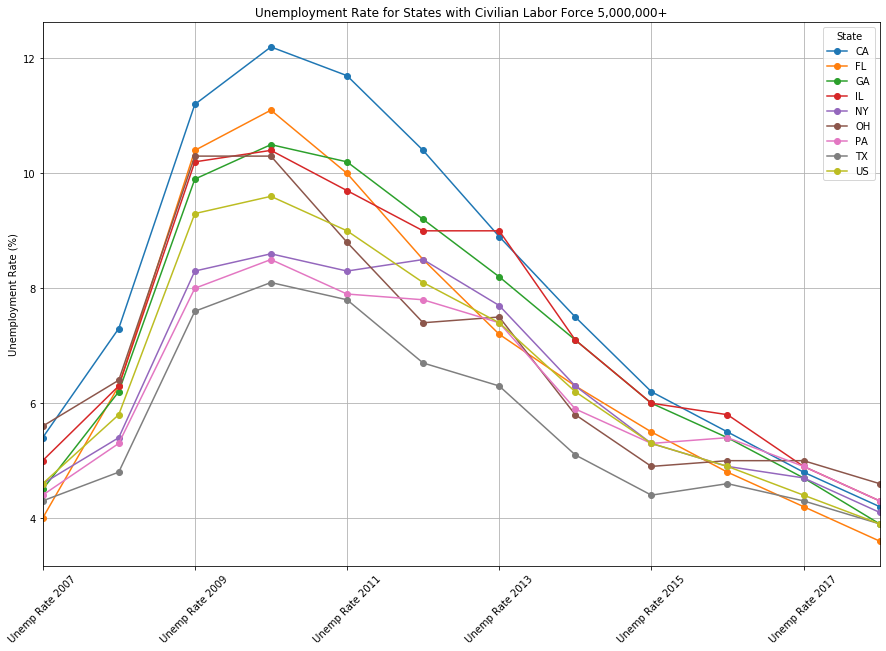

In [106]:
add_us5 =[unemp_by_size["5,000,000+"]['unemp_by_size'],us_unemployment]
results06 = pd.concat(add_us5, axis=0)
results06.T.plot.line(figsize=(15,10), marker='o')
plt.xticks(rotation='45')
plt.title("Unemployment Rate for States with Civilian Labor Force 5,000,000+")
plt.ylabel("Unemployment Rate (%)")
plt.grid()


In [31]:
house_price_by_size = {}
for y in group_names:
    house_price_by_size[y] = {
        'house_price_by_size': med_house_price_size(y)
    }

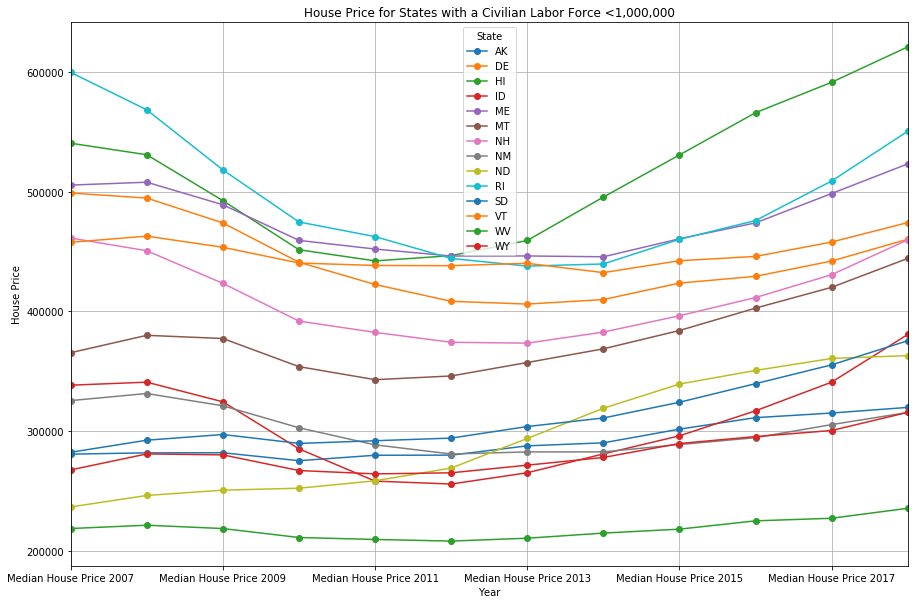

In [71]:
house_price_by_size["<1,000,000"]['house_price_by_size'].T.plot.line(figsize=(15,10),marker='o')
plt.title("House Price for States with a Civilian Labor Force <1,000,000")
plt.ylabel("House Price")
plt.xlabel("Year")
plt.grid()

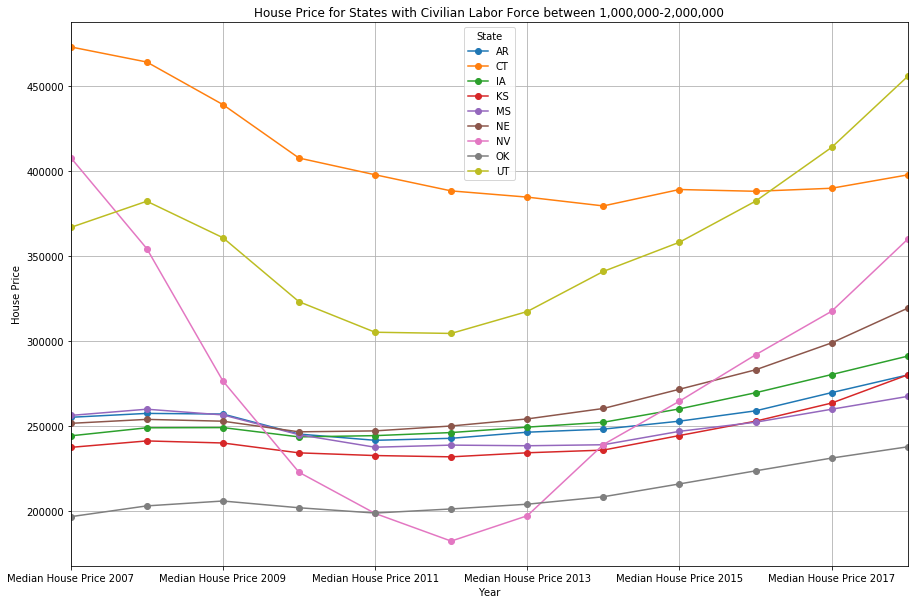

In [70]:
house_price_by_size["1,000,000-2,000,000"]['house_price_by_size'].T.plot.line(figsize=(15,10),marker='o')
plt.title("House Price for States with Civilian Labor Force between 1,000,000-2,000,000")
plt.ylabel("House Price")
plt.xlabel("Year")
plt.grid()

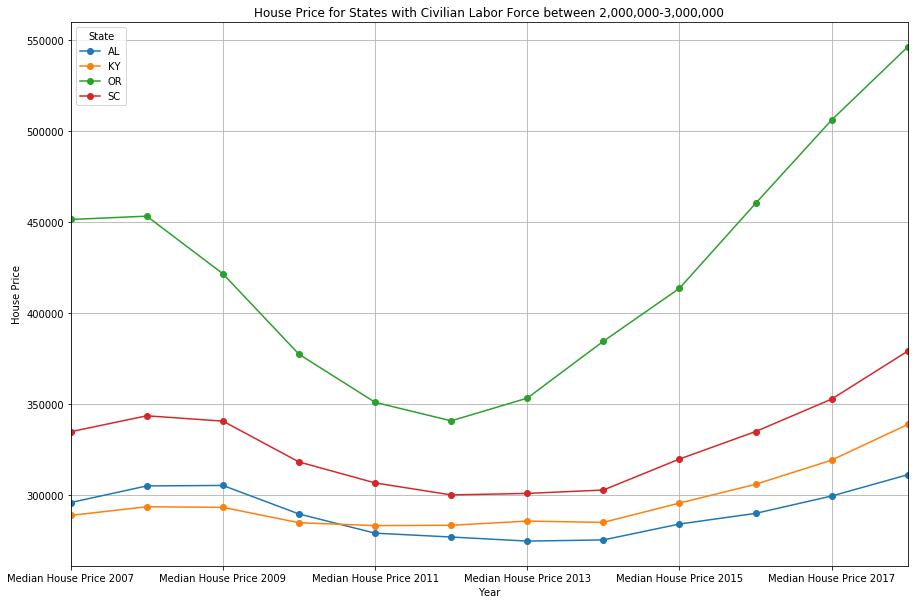

In [69]:
house_price_by_size["2,000,000-3,000,000"]['house_price_by_size'].T.plot.line(figsize=(15,10),marker='o')
plt.title("House Price for States with Civilian Labor Force between 2,000,000-3,000,000")
plt.ylabel("House Price")
plt.xlabel("Year")
plt.grid()

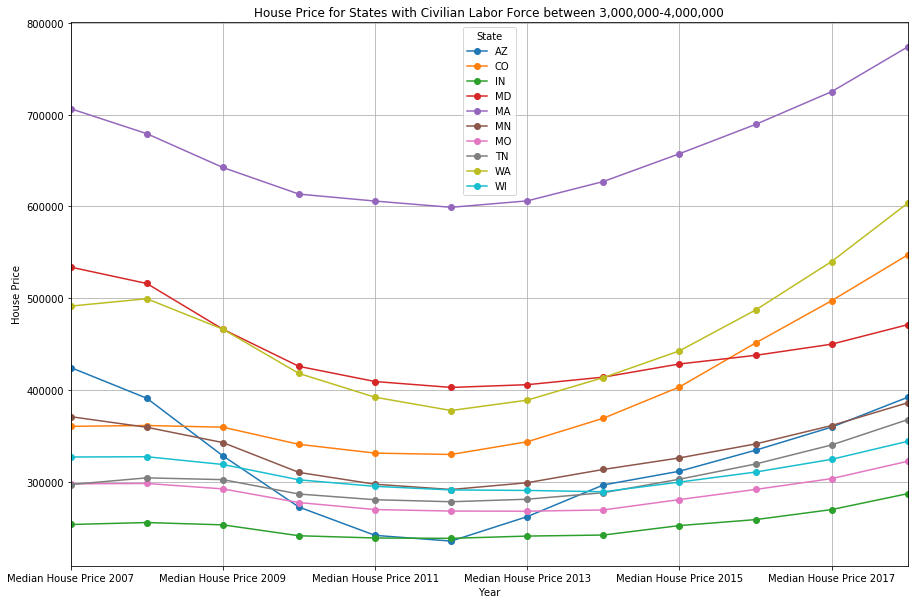

In [68]:
house_price_by_size["3,000,000-4,000,000"]['house_price_by_size'].T.plot.line(figsize=(15,10),marker='o')
plt.title("House Price for States with Civilian Labor Force between 3,000,000-4,000,000")
plt.ylabel("House Price")
plt.xlabel("Year")
plt.grid()

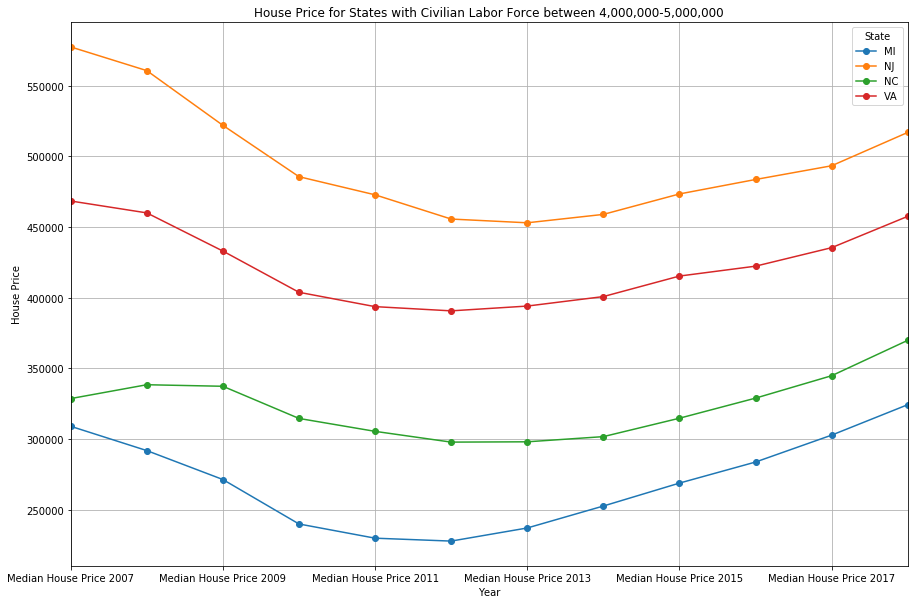

In [67]:
house_price_by_size["4,000,000-5,000,000"]['house_price_by_size'].T.plot.line(figsize=(15,10),marker='o')
plt.title("House Price for States with Civilian Labor Force between 4,000,000-5,000,000")
plt.ylabel("House Price")
plt.xlabel("Year")
plt.grid()

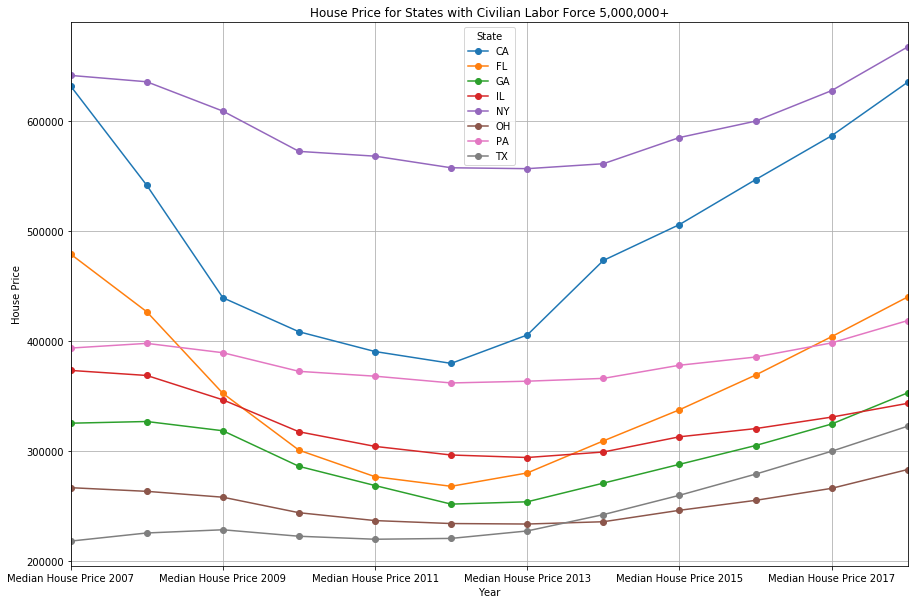

In [66]:
house_price_by_size["5,000,000+"]['house_price_by_size'].T.plot.line(figsize=(15,10),marker='o')
plt.title("House Price for States with Civilian Labor Force 5,000,000+")
plt.ylabel("House Price")
plt.xlabel("Year")
plt.grid()

In [38]:
bins1 = [100000,300000,400000,500000,800000]
group_names1 = ["100,000-300,000","300,000-400,000","400,000-500,000","500,000+"]
e_states["Starting House Price"] = pd.cut(e_states["Median House Price 2007"], bins1, labels=group_names1)


In [39]:
def start_house_price_group(price):
    pop=e_states.loc[e_states["Starting House Price"]== price]
    return pop[["Median House Price 2007","Median House Price 2008","Median House Price 2009","Median House Price 2010","Median House Price 2011","Median House Price 2012","Median House Price 2013","Median House Price 2014","Median House Price 2015","Median House Price 2016","Median House Price 2017","Median House Price 2018"]]

In [40]:
grouped_house_price = {}
for i in group_names1:
    grouped_house_price[i] = {
        'gr_house_price': start_house_price_group(i)
    }

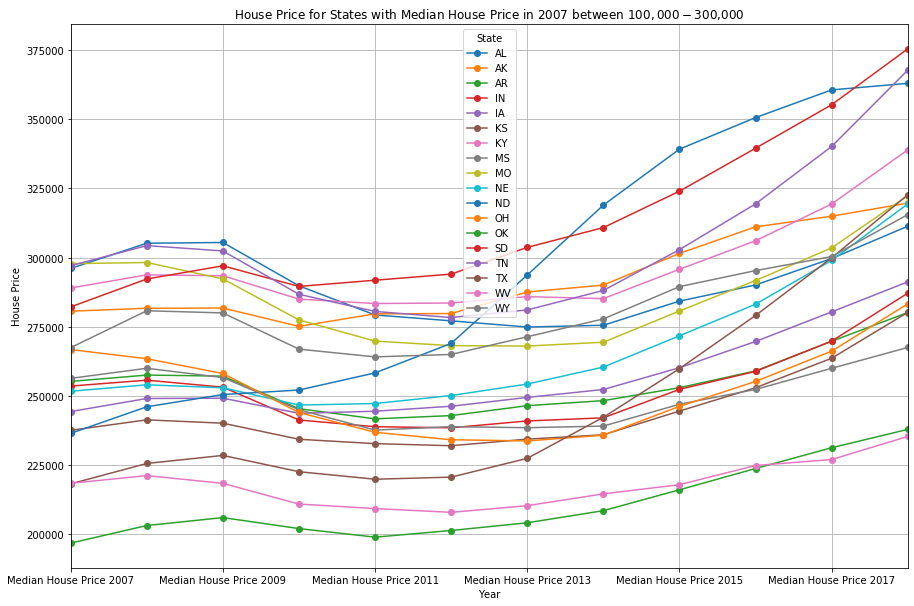

In [65]:
grouped_house_price["100,000-300,000"]['gr_house_price'].T.plot.line(figsize=(15,10),marker='o')
plt.title("House Price for States with Median House Price in 2007 between $100,000-$300,000")
plt.ylabel("House Price")
plt.xlabel("Year")
plt.grid()

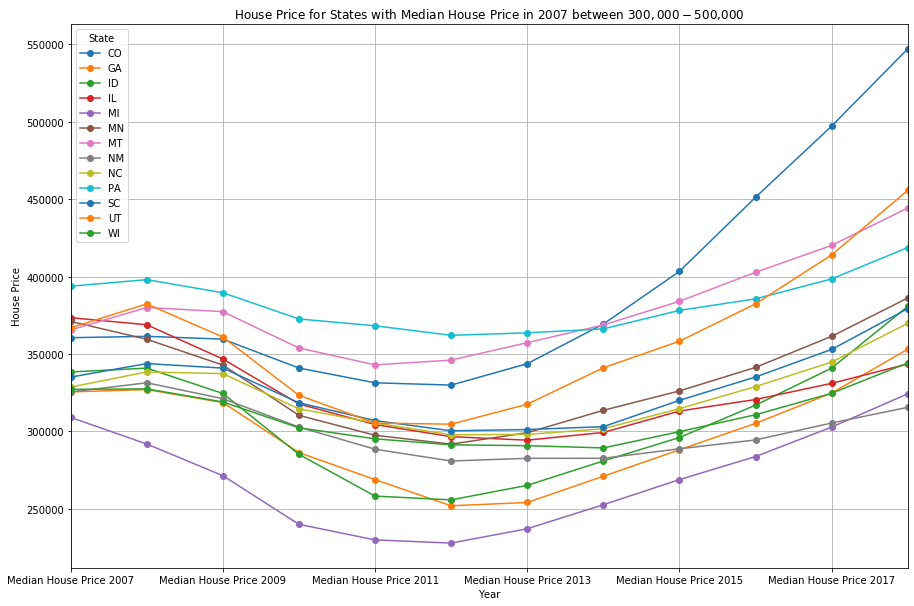

In [64]:
grouped_house_price["300,000-400,000"]['gr_house_price'].T.plot.line(figsize=(15,10),marker='o')
plt.title("House Price for States with Median House Price in 2007 between $300,000-$500,000")
plt.ylabel("House Price")
plt.xlabel("Year")
plt.grid()

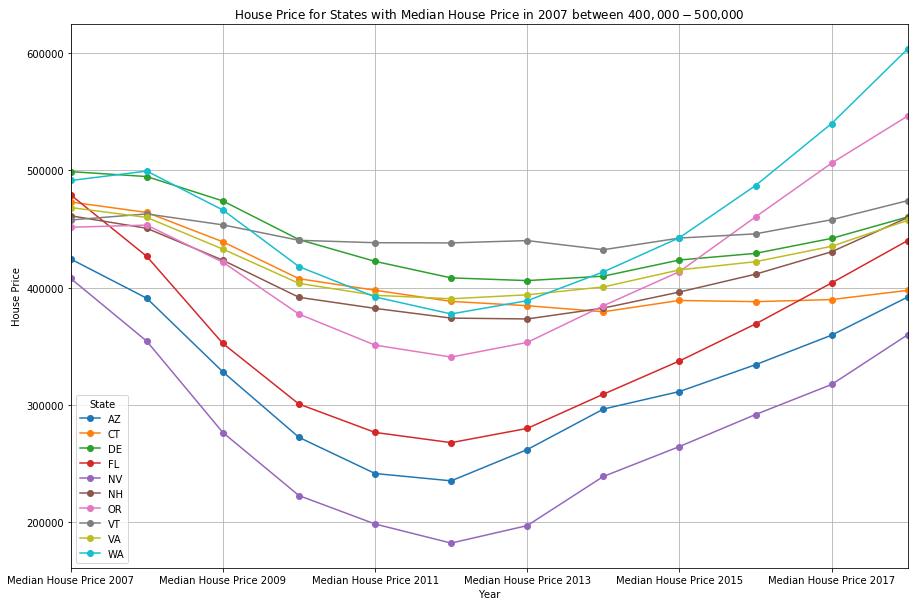

In [63]:
grouped_house_price["400,000-500,000"]['gr_house_price'].T.plot.line(figsize=(15,10),marker='o')
plt.title("House Price for States with Median House Price in 2007 between $400,000-$500,000")
plt.ylabel("House Price")
plt.xlabel("Year")
plt.grid()

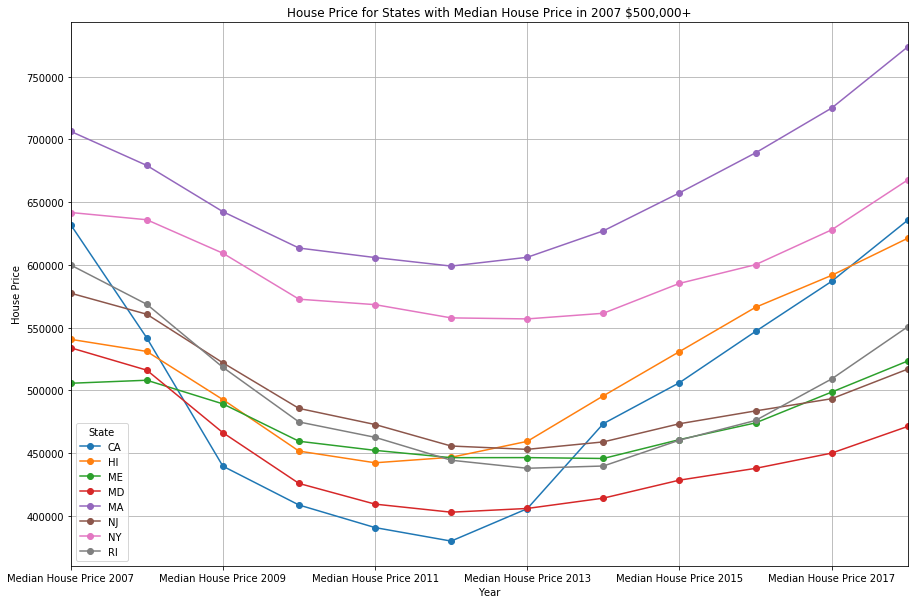

In [62]:
grouped_house_price["500,000+"]['gr_house_price'].T.plot.line(figsize=(15,10),marker='o')
plt.title("House Price for States with Median House Price in 2007 $500,000+")
plt.ylabel("House Price")
plt.xlabel("Year")
plt.grid()

In [45]:
def unemployment_by_start_house_price(price):
    pop = e_states.loc[e_states["Starting House Price"]== price]
    return pop[["Unemp Rate 2007","Unemp Rate 2008","Unemp Rate 2009","Unemp Rate 2010","Unemp Rate 2011","Unemp Rate 2012","Unemp Rate 2013","Unemp Rate 2014","Unemp Rate 2015","Unemp Rate 2016","Unemp Rate 2017","Unemp Rate 2018"]]


In [46]:
unemp_by_house_price = {}
for a in group_names1:
    unemp_by_house_price[a] = {
        'unemp_by_price': unemployment_by_start_house_price(a)
    }

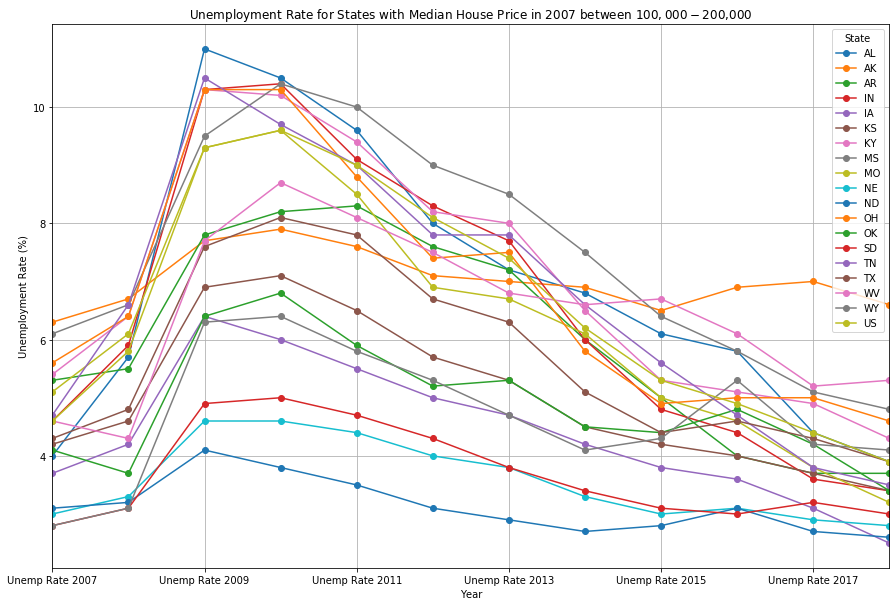

In [105]:
frame3 = [unemp_by_house_price['100,000-300,000']['unemp_by_price'],us_unemployment]
results4 = pd.concat(frame3, axis=0)
results4.T.plot.line(figsize=(15,10), marker='o')
plt.title("Unemployment Rate for States with Median House Price in 2007 between $100,000-$200,000")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Year")
plt.grid()

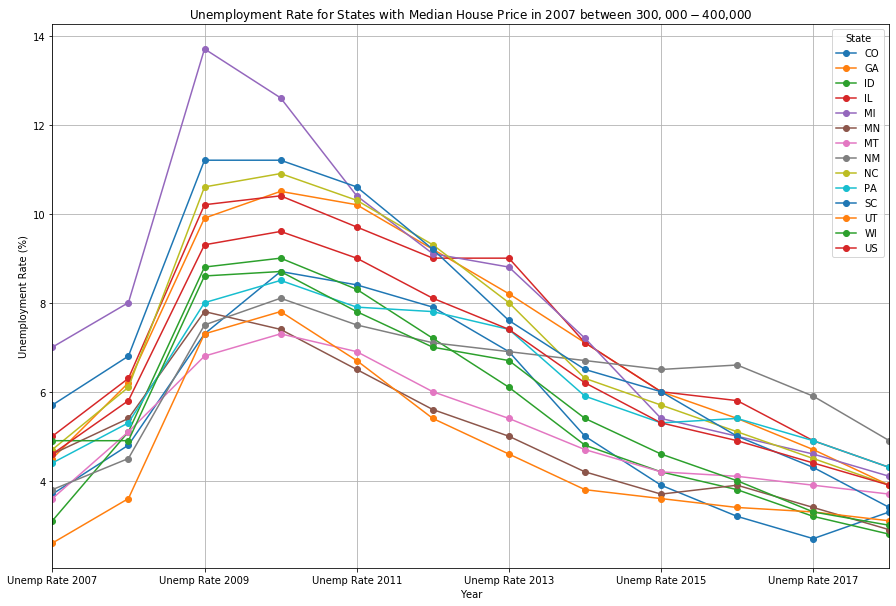

In [104]:
frame2 = [unemp_by_house_price['300,000-400,000']['unemp_by_price'],us_unemployment]
results3 = pd.concat(frame2, axis=0)
results3.T.plot.line(figsize=(15,10), marker='o')
plt.title("Unemployment Rate for States with Median House Price in 2007 between $300,000-$400,000")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Year")
plt.grid()

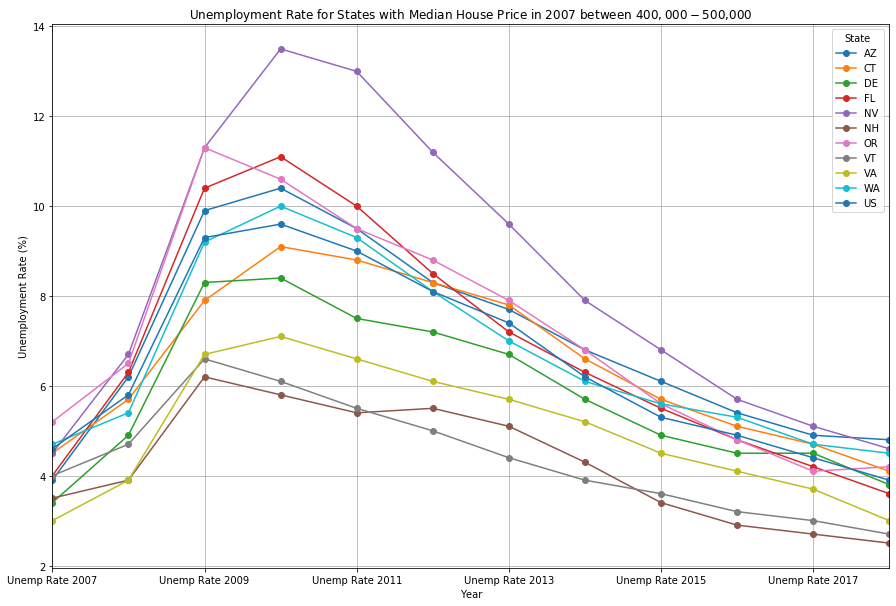

In [103]:
frame1 = [unemp_by_house_price['400,000-500,000']['unemp_by_price'],us_unemployment]
results2 = pd.concat(frame1, axis=0)
results2.T.plot.line(figsize=(15,10), marker='o')
plt.title("Unemployment Rate for States with Median House Price in 2007 between $400,000-$500,000")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Year")
plt.grid()

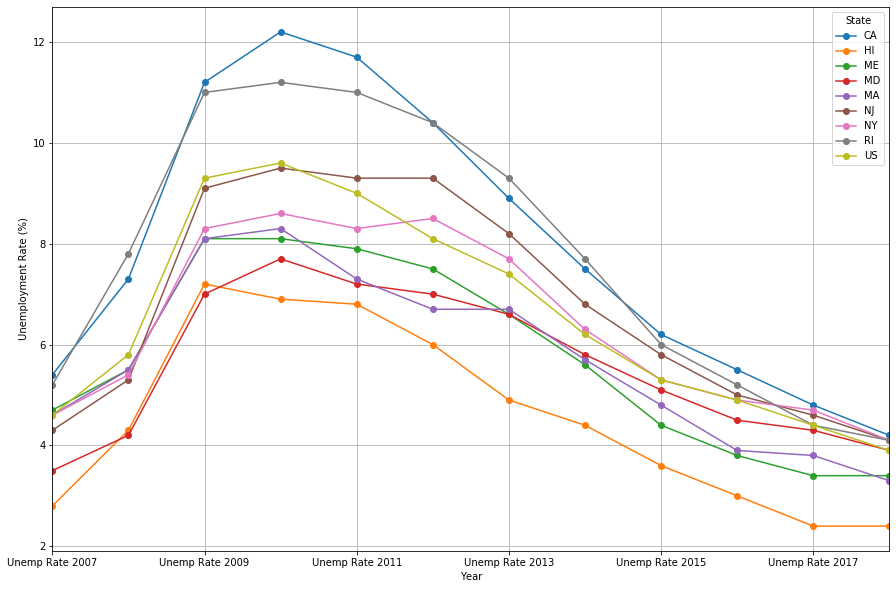

In [90]:
frame = [unemp_by_house_price['500,000+']['unemp_by_price'],us_unemployment]
results1 = pd.concat(frame, axis=0)
results1.T.plot.line(figsize=(15,10), marker='o')
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Year")
plt.grid()

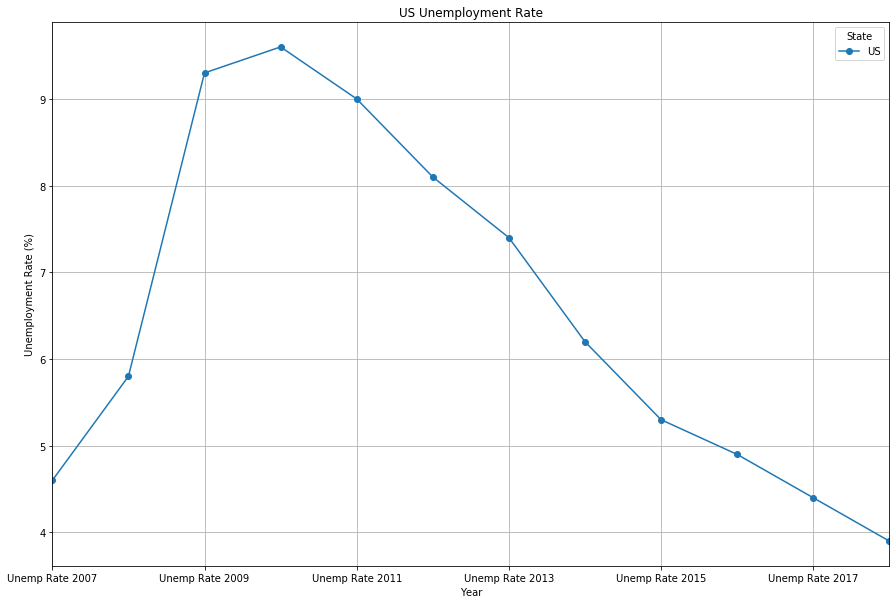

In [100]:
us_unemployment.T.plot.line(figsize=(15,10),marker='o')
plt.title("US Unemployment Rate")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Year")
plt.grid()